# Profile COG internals

Profile cog internal estructure with reading time of the rio-tiler `Reader`

In [1]:
from functools import partial
from typing import Callable

from rio_tiler.profiles import img_profiles
from rio_tiler.io import Reader
import mercantile
import random
import time
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt

In [3]:
def read_tile(url, x, y, z, band):
    with Reader(url) as cog:
        image = cog.tile(x, y, z, indexes=band)
        image.data_as_image()

def experiment(n_experiments, url):
    results = []
    for _ in tqdm(range(n_experiments)):
        # make a random tile
        tile = mercantile.tile(random.uniform(-180, 180), random.uniform(-85.051, 85.051), random.randint(1, 10))
        before = time.time()
        read_tile(url,*tile, random.randint(1, 16))
        after = time.time()
        results.append(after - before)
    return results


def run_and_show_results(experiment: Callable, url: str):
    res = experiment(url)
    print(f"Average time: {np.mean(res)}")
    print(f"Median time: {np.median(res)}")
    plt.hist(res, bins=20)
    plt.show()

experiment1 = partial(experiment, 2000)
run_and_show_results = partial(run_and_show_results, experiment1)

100%|██████████| 2000/2000 [00:42<00:00, 47.28it/s]

Average time: 0.021017874717712402
Median time: 0.020823240280151367


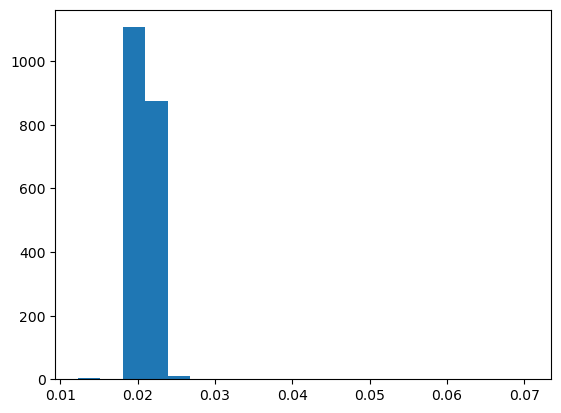

In [4]:
url = "cogs/foodscapes_stack_cog_lzw.tif"  # band interleaved, lzw compression, mercator aligned tiles
run_and_show_results(url)

100%|██████████| 2000/2000 [00:43<00:00, 45.50it/s]

Average time: 0.021831828713417052
Median time: 0.022077560424804688


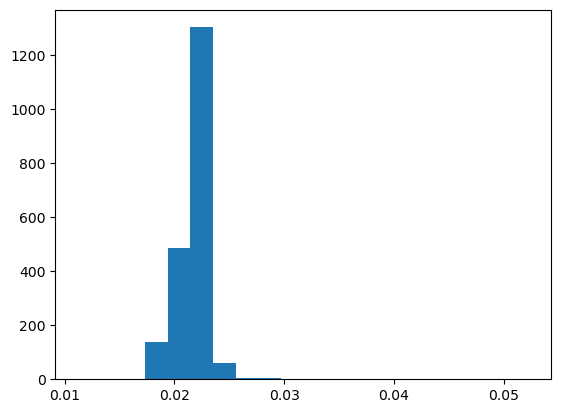

In [5]:
# pixel interleaved, deflate compression, aligned
run_and_show_results("cogs/foodscapes_stack_cog.tif")

100%|██████████| 2000/2000 [00:45<00:00, 44.32it/s]

Average time: 0.022421773672103882
Median time: 0.021703481674194336


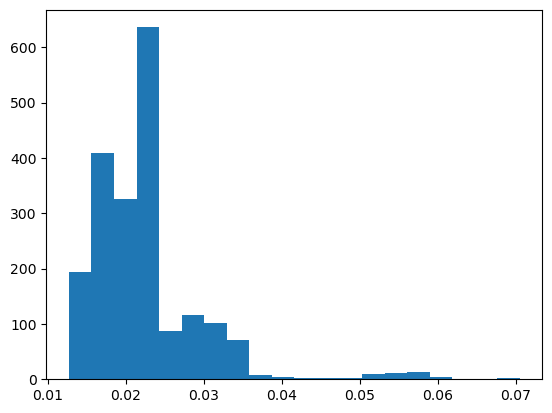

In [6]:
# pixel interleave, deflate, non aligned grid
run_and_show_results(
    "/home/biel/Vizzuality/dev/sci_team_data_bank/Projects/foodscapes/data/all/cogs/foodscapes_stack_cog_nonweb.tif",
)
